In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

# Informe del experimento con el tubo escintilador:

#### David García Gómez
#### Juan Montoya Sánchez

## Resumen:

Debido a la gran cantidad de átomos que pueden sufrir decaimientos en cualquier momento, pero la baja probabilidad de que un átomo en particular decaiga, la distribución que rige la actividad radiativa es la de Poisson. 


En el laboratorio se usa un tubo enscintilador y un dispositivo de conteo para medir la cantidad de eventos radiativos que ocurren espontáneamente en el ambiente debido a decaimiento de partículas. Posteriormente se realiza un estudio estadístico de los datos obtenidos para comprobar si  corresponden a una distribución de Poisson. Finalmente se le comprueba la bondad del ajuste con la prueba de chi cuadrado.


 ###Se tomaron datos de conteo en un equipo que mide radiación utilizando como objeto experimental la radiación de fondo para contar en cuanto tiempo ocurren tres eventos. Y luego, después de hayar la media con 10 datos experimentales de el tiempo que demora en contar tres eventos, utilizar el tiempo medio para tomar treinta datos de cuántos eventos suceden en este intervalo de tiempo y analizar qué distribución siguen los datos obtenidos.

## Introducción:

En el estudio de sistemas macroscópicos no siempre podemos tener en cuenta todas las variables que el proceso intrísecamente presenta. El enfoque en este tipo de sistemas es realizar repetitivamente experimentos para recolectar datos del fenómeno. Luego a estos datos se les realiza un análisis estadístico que permite concluir con cierto grado de fiabilidad una hipótesis propuesta.


En esta práctica de laboratorio se estudiará el fóndo radiativo a través de una de las propiedades más usadas en el campo de la física nuclear llamada "escintilación o centelleo". Consiste en la propiedad de ciertos materiales que al recibir radiación emiten un pequeño haz de luz. Este  pequeño haz de luz, puede luego acoplarse a un fotomultiplicador que convierta la luz en pequeños pulsos eléctricos que pueden ser medibles. Estos pulsos eléctricos permiten obtener información sobre la radiación incidente en el tubo [1].

En 1903, Sir William Crookes creó el primer escintilador[1]. Consistía en una pantalla de ZnS en la que era posible ver con un microscopio el centelleo causado por partículas alpha. Más tarde en 1944 los científicos Curran y Baker cambiaron el microscópio por un fotomultiplicador que generaba pulsos eléctricos cada que un evento radiativo sucedía[1]. Esto mejoró en gran medida la presición y fiabilidad de los experimentos ya que una señal eléctrica puede ser más fiable que la percepción del ojo humano.

En este caso, el experimento realizado consiste ver cuántos segundos demora el tubo escintilador en contar tres eventos. Esto se repite diez veces y se extrae la media. Luego este valor medio del tiempo que tarda en registrar tres eventos se usa para contar cuántos eventos ocurren en este lapso. Este experimento se repitió 31 veces para el tubo escintilador sin ninguna muestra radioactiva cerca, y luego otras 31 veces con una pequeña barra de material radioactivo (del que posiblemente todos sus elementos radiactivos ya hubieran decaido).


## Desarrollo

En el laboratorio, se nos entregó un dispositivo de conteo que utilizaba un tubo escintilador para detectar eventos de radiación.



<img src="Count.jpeg" alt="Descripción de la imagen" style="width: 600px; height: 400px;" />

                                                                                           Fig.1
Junto con este, también se nos entregó un cronómetro, con el cual se nos pedía tomar datos de los eventos contados por el dispositivo interactuando con la radiación de fondo, o sea, sin ninguna muestra radioactiva cerca y luego con una pequeña barra de material radioactivo.

<img src="cronómetro.jpg" alt="Descripción de la imagen" style="width: 400px; height: 400px;" />

                                                  (cronómetro)                             Fig.2


<img src="Cintilador_barra.jpeg" alt="Descripción de la imagen" style="width: 500px; height: 400px;" />

                                            (Cintilador con la barra radiativa)             Fig.3
                                         
                                         
                                         
Los datos obtenidos del tiempo en que el equipo contaba tres eventos son los siguientes: 
                                         


In [4]:
# Tiempo que tarda en contar tres eventos

Tiempo=[9.86,1.89,8.59,1.52,4.49,4.40,4.55,5.05,1.06,1.72]
print("La media del tiempo en que tarda la máquina en contar tres eventos es:",np.mean(Tiempo),"segundos")

La media del tiempo en que tarda la máquina en contar tres eventos es: 4.313000000000001 segundos


La media aritmética del tiempo es de 4.3 segundos, sin embargo, se redondea a 4 para los siguientes experimentos.


Ahora, se cuenta en 4 segundos, cuántos eventos cuenta la máquina debido a la radiación de fondo, o sea sin la barra de material radiativo cerca. Este experimento se repitio 31 veces. Los datos obtenidos son los siguientes:

In [5]:
#Número de conteos en cuatro segundos sin la muestra
Conteo1=[4,6,1,2,6,6,6,2,4,2,7,3,6,4,3,5,1,4,2,3,3,3,2,0,1,5,5,4,2,3,3]


Después se repitió el experimento con la muestra de material radiativo cerca (Fig.2). También se tomaron 31 datos, que son los siguientes:

In [6]:
#Número de conteos en cuatro segundos con la muestra
Conteo2=[2,3,5,5,3,5,5,1,4,5,2,2,4,2,8,5,4,2,4,4,4,7,5,3,3,3,6,3,2,3,6]

Para comprobar si efectivamente los datos obtenidos corresponden a una distribución de Poisson, se realiza un histograma de frecuencia de los datos. 

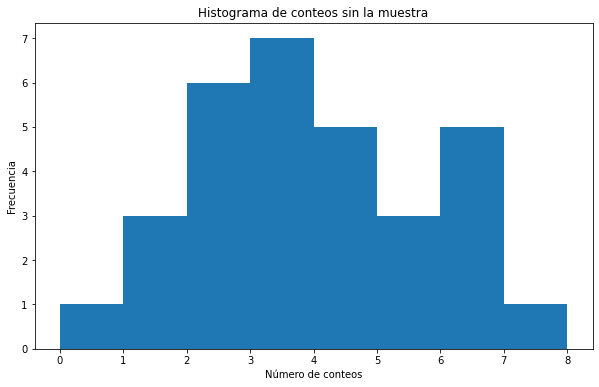

In [7]:
plt.figure(figsize=(10,6))
y, x, _ = plt.hist(Conteo1, bins=range(9))
#plt.close()
#plt.bar(x[:-1], y, width=1)
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos sin la muestra')
plt.show()

Ahora, se le realiza un ajuste con la distribución de Poisson:

In [8]:
# Se define la distribución de Poisson
def poisson(x, lamda):
    return ((lamda**x) / factorial(x)) * np.exp(-lamda)
x=[0, 1, 2, 3, 4, 5, 6, 7]
y=[1, 3, 6, 7, 5, 3, 5, 1]
# Se utiliza la función curve_fit de Scipy para ajustar los datos.
lamda, pcov = curve_fit(poisson, x,y , 1)
print("El valor ajustado para lambda con los datos experimentales es de:",lamda[0])

El valor ajustado para lambda con los datos experimentales es de: 2.972187555158529


Al usar la función "curve_fit" de la librería de python scipy.optimize, obtenemos que el valor de lambda que mejor ajusta los datos experimentales es 2.9, donde la distribución de Poisson es:

$$\frac{\lambda^x e^{-\lambda}}{x!}$$

Ahora realizamos un gráfico para comparar los datos experimentales con el ajuste obtenido:

[1.5869273294144686, 4.716645659426643, 7.009377765520179, 6.944395121361325, 5.160011189453433, 3.0673042083544506, 1.51943389932608, 0.6451489323518532]
[1.58692733 4.71664566 7.00937777 6.94439512 5.16001119 3.06730421
 1.5194339  0.64514893]


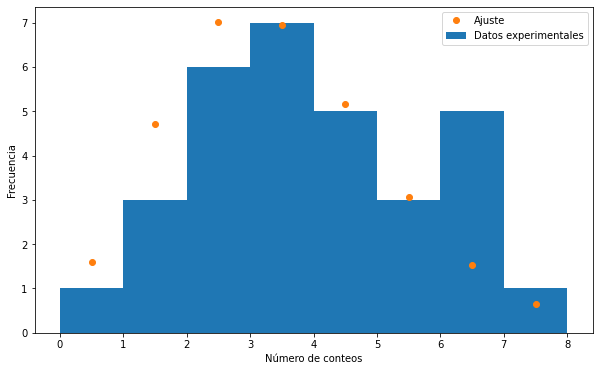

In [9]:
plt.figure(figsize=(10,6))
plt.xlabel("Número de conteos")
plt.ylabel("Frecuencia")
plt.hist(Conteo1,range(9),label="Datos experimentales")
x=np.array(x)
yaj=[]
for i in range(8):
    yaj.append(float(poisson(x[i],lamda)*31))
print(yaj)
yaj=np.array(yaj) 
print(yaj)
plt.plot(x+0.5,yaj,"o",label="Ajuste")
plt.legend()
plt.show()

Ahora realizaremos una prueba de bondad del 5% con chi cuadrado:

In [11]:
#Importamos la librería para los valores de rechazo o aceptación del test de hipótesis de chi cuadrado que tiene scipy.stats
from scipy.stats import chi2
y=[1, 3, 6, 7, 5, 3, 5, 1]
y=np.array(y)
# Valor de lambda ajustado
lam = lamda[0]
#print(lam)

# Frecuencias esperadas
expected_freq =  yaj
#print(expected_freq)

# Frecuencias observadas
observed_freq = y

# Estadística de chi-cuadrado
chi_squared_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
#print(chi_squared_stat)

# Grados de libertad
degrees_of_freedom = 8 - 1
#print(degrees_of_freedom)

# Valor crítico de chi-cuadrado para un nivel de significancia del 5%
alpha = 0.05
## Se utiliza la librería para el valor crítico al 5%
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
#print(critical_value)

# Comparación con el valor crítico
if chi_squared_stat > critical_value:
    print("La distribución de Poisson no se ajusta bien a los datos.")
else:
    print("La distribución de Poisson se ajusta bien a los datos.")

La distribución de Poisson se ajusta bien a los datos.


El código anterior, utiliza la librería scipy.stats para realizar la prueba de bondad al 5% de chi cuadrado. Donde podemos ver entonces que con este grado de fiabilidad, podemos decir que nuestro ajuste está bien (aceptar o rechazar la hipótesis)[2].


Ahora, repetimos el proceso de análisis de datos, pero en este caso, con los datos obtenidos cuando la barra radiativa está cerca. 

Realizamos primero el histograma:

[0. 1. 6. 7. 6. 7. 2. 1. 1.]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


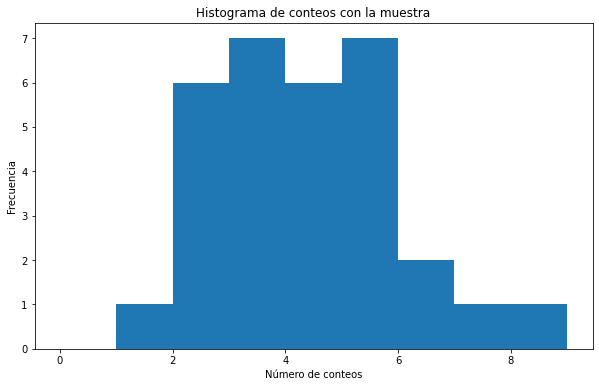

In [32]:
plt.figure(figsize=(10,6))
y,z, _ = plt.hist(Conteo2, bins=range(10))
x=[0,1,2,3,4,5,6,7,8]
lamda, _=curve_fit(poisson,x,y)
print(y)
print(x)
#plt.close()
#plt.bar(x[:-1], y, width=1)
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con la muestra')
plt.show()

Ahora, realizaremos de nuevo el ajuste con Poisson para comprobar si la distribución cambia por la presencia de la muestra radiativa que se puso cerca del tubo escintilador. Tambien cabe aclarar que es posible que todos los átomos de la muestra radiativa hayan decaido por el paso del tiempo, o una gran parte. Lo que puede hacer despreciable su presencia.

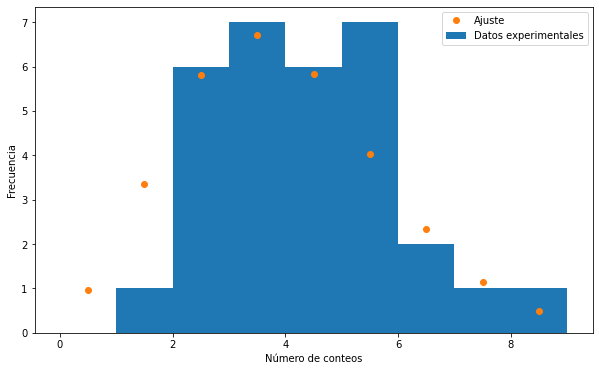

In [33]:
plt.figure(figsize=(10,6))
plt.xlabel("Número de conteos")
plt.ylabel("Frecuencia")
plt.hist(Conteo2,range(10),label="Datos experimentales")
x=np.array(x)
#print(x)
yaj=[]
for i in range(9):
    yaj.append(float(poisson(x[i],lamda)*31))
#print(yaj)
yaj=np.array(yaj) 
#print(yaj)
plt.plot(x+0.5,yaj,"o",label="Ajuste")
plt.legend()
plt.show()

En la gráfica anterior, se muestra el histograma de los valores obtenidos en el experimento y los datos ajustados. Ahora, realizaremos de nuevo un test de bondad del 5% con chi cuadrado:

In [34]:
y=np.array(y)
# Valor de lambda ajustado
lam = lamda[0]
#print(lam)

# Frecuencias esperadas
expected_freq =  yaj
#print(expected_freq)

# Frecuencias observadas
observed_freq = y

# Estadística de chi-cuadrado
chi_squared_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
#print(chi_squared_stat)

# Grados de libertad
degrees_of_freedom = 8 - 1
#print(degrees_of_freedom)

# Valor crítico de chi-cuadrado para un nivel de significancia del 5%
alpha = 0.05
## Se utiliza la librería para el valor crítico al 5%
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
#print(critical_value)

# Comparación con el valor crítico
if chi_squared_stat > critical_value:
    print("La distribución de Poisson no se ajusta bien a los datos.")
else:
    print("La distribución de Poisson se ajusta bien a los datos.")

La distribución de Poisson se ajusta bien a los datos.


In [35]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

# Datos
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 3, 6, 7, 5, 3, 5, 1])

# Ajuste de la distribución de Poisson
def poisson_distribution(x, lam):
    return poisson.pmf(x, lam)

popt, _ = curve_fit(poisson_distribution, x, y)

# Valor de lambda ajustado
lam = popt[0]
#print(lam)

# Frecuencias esperadas
expected_freq = poisson_distribution(x, lam) * np.sum(y)
#print(expected_freq)

# Frecuencias observadas
observed_freq = y

# Estadística de chi-cuadrado
chi_squared_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
#print(chi_squared_stat)

# Grados de libertad
degrees_of_freedom = len(x) - len(popt)
#print(degrees_of_freedom)

# Valor crítico de chi-cuadrado para un nivel de significancia del 5%
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
#print(critical_value)

# Comparación con el valor crítico
if chi_squared_stat > critical_value:
    print("La distribución de Poisson no se ajusta bien a los datos.")
else:
    print("La distribución de Poisson se ajusta bien a los datos.")


La distribución de Poisson se ajusta bien a los datos.


Obtenemos entonces que también se ajusta bien a la distribución de Poisson.


## Conclusiones:

Para ambas experimentos, tanto el que tenía cerca la muestra radiativa como el que no el ajuste con la distribución de Poisson tiene una fiabilidad del 5%. Debemos tener en cuenta que el ajuste y los valores de un experimento a otro cambian. Así mismo cambia el valor de lambda ajustado para el primer experimento y para el segundo. Sin embargo, la distribución que los datos siguen (la de Poisson) se mantiene con bastante fiabilidad.

Seguramente tomando una muestra mas grande para ambos datos podríamos hacer un test de hipótesis con una tolerancia menor, no del 5% sino menos, y así comprobar con más fiabilidad que los datos en efecto siguen la distribución de Poisson. Sin embargo, para efectos prácticos y con los datos tomados, podemos concluir que los datos obtenidos en ambos experimentos siguen la distribución de Poisson.

Esto también nos indica que la barra radiativa fue insignificante en los resultados del segundo experimento, lo que puede significar que su capacidad radiativa ha menguado por el paso del tiempo. O sea que la mayoría de sus átomos ya ha decaido.

## Referencias:

* [1] W. R. Leo, "Techniques for Nuclear and Particle Physics," Springer, 1994 , pag 149


* [2] Sirca, S. (2016). Probability for Physicists. Springer.